# <a id='toc1_'></a>[The ***Best*** Albums of All Time](#toc0_)

This notebook presents my work in developing recommendation systems which can generate recommendations for music albums based off a given album's musical characteristics, such as acousticness, danceability, energy amongst other musical features. 

> we shall create a content based feature to generate recommendations for music albums based off several spotify features of the best albums of all time

<img src="/Users/pavansingh/Library/CloudStorage/GoogleDrive-pavansingho23@gmail.com/My Drive/Portfolio/My Github/Recommender-Systems/img/albums.jpeg" width="650" height="350">

**Table of contents**<a id='toc0_'></a>    
- [Overview](#toc2_)    
  - [Data](#toc2_1_)    
    - [Album Data](#toc2_1_1_)    
    - [Album Musical Features](#toc2_1_2_)    
- [Data Exploration](#toc3_)    
  - [Descriptive Statistics](#toc3_1_)    
  - [Data Visualization](#toc3_2_)    
    - [K-Means](#toc3_2_1_)    
    - [PAM Clustering](#toc3_2_2_)    
  - [Correlation Matrix](#toc3_3_)    
  - [Missing Values](#toc3_4_)    
- [Content Based Filtering](#toc4_)    
  - [Model 1: Standard CBF](#toc4_1_)    
  - [Model 2: CBF with Weighted Similarity Measure](#toc4_2_)    
- [Results and Conclusion](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->


# <a id='toc2_'></a>[Overview](#toc0_)

To create a content-based recommender system for music albums based on musical features, you can use the dataset that contains information about thousands of music albums, including danceability, energy, and other musical features. We outline below the process followed and the models generated. 

1. Data Exploration: Identify initial trends and get a better understanding of the data. 
2. Data Preprocessing: Clean and pre-process the data to remove any missing or inconsistent values. We may also need to normalize the musical features to ensure that they are on a common scale.
3. Recommendation Systems Generation: Based on the similarity matrix, generate recommendations for a given album by selecting the most similar albums to the given album.
    * Model 1: Content Based Recommender System using only musical features
    * Model 2: Content Based Recommender System using musical features and album ratings

To achieve Model 2, we shall make use of a weighted similarity measure such as the weighted cosine similarity or the weighted Pearson correlation to measure the similarity between the albums. WE can take into account album ratings and ensure that popular albums are ranked higher. We shall compare results from Model 1 and Model 2.


## <a id='toc2_1_'></a>[Data](#toc0_)

The dataset of albums and music features was taken from [Kaggle](https://www.kaggle.com/datasets/lucascantu/top-5000-albums-of-all-time-spotify-features). It contains information about 4402 albums, including Spotify features that can be found using their API. 

### <a id='toc2_1_1_'></a>[Album Data](#toc0_)

Below is a summary of the description of some of the general data contained  about the music albums, like their name, artist and release data. 

- **ars_name**: artist or group name
- **rel_date**: release date 
- **gens**: genre of album
- **descs**: description of album
- **avg_rat**: average rating of album
- **num_rat**: number of ratings album has
- **album**: album name
- **duration_ms**: length of album in milliseconds
- **time_signature**: 

### <a id='toc2_1_2_'></a>[Album Musical Features](#toc0_)

- **acousticness**
    * describes the acoustic sound of an album. It's a value between 0.0 and 1.0 that represents the probability of the track being purely acoustic (1.0) or purely electronic (0.0). It provides an indication of the amount of acoustic instruments and live recordings used in a piece of music.

<br>

- **energy**
    * describes the perceptual "vitality" or "excitement" of a track. It is a value between 0.0 and 1.0 that represents the amount of "energy" a track possesses. It is a measure of how "energetic" or "fast-paced" a track is, and it provides an indication of how active and intense the track is.

<br>

- **instrumentalness**
    * describes the presence of vocal content in a track. It is a value between 0.0 and 1.0 that represents the probability of the track being purely instrumental (1.0) or containing vocal content (0.0).  It provides an indication of whether or not a track contains vocals.

<br>

- **liveness**
    * describes the likelihood of a track being recorded in front of a live audience. It is a value between 0.0 and 1.0 that represents the probability of the track being recorded live (1.0) or in a studio or other controlled environment (0.0). It provides an indication of whether or not a track was recorded in front of a live audience.

<br>

- **loudness**
    * describes the overall loudness of a track. It is typically measured in decibels (dB) and is relative to a reference level, such as the loudness of a human voice or the average loudness of modern pop songs. It provides an indication of the overall volume of the track. 

<br>

- **speechiness**
    * describes the presence of spoken words or other forms of speech in a track. It is a value between 0.0 and 1.0 that represents the probability of the track containing speech content (1.0) or being purely instrumental or sung (0.0). It is a measure of how "talkative" or "speech-like" a track is, and it provides an indication of whether or not a track contains spoken words or other forms of speech.

<br>

- **tempo** 
    * describes the pace or speed of a track. It is typically measured in beats per minute (BPM) and reflects the number of beats that occur in a minute of music. It's a measure of how fast or slow a track is.

<br>

- **valence**
    * describes the emotional tone or mood of a track. It is a value between 0.0 and 1.0 that represents the level of positivity (1.0) or negativity (0.0) in the music. So it is a measure of how "positive" or "negative" a track is,

<br>

- **time_signature**
    * describes the rhythm of a track. It is a notational convention that indicates how many beats are in each measure of music and what the beat unit is. 

In [68]:
# Load packages

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import matplotlib.cm as cm
from datetime import datetime
from scipy import stats
%matplotlib inline

In [69]:
# load data
album_data = pd.read_csv("/Users/pavansingh/Library/CloudStorage/GoogleDrive-pavansingho23@gmail.com/My Drive/Portfolio/My Github/Recommender-Systems/Data/Top5000.csv", index_col=[0])
display(album_data.head(4))
print("Shape of Data:", album_data.shape)

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature
0,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531,OK Computer,0.135763,0.288083,0.565917,0.161053,0.159375,-9.102417,0.056308,115.450750,0.291733,268435.500000,4.000000
1,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983,Wish You Were Here,0.602800,0.373600,0.409800,0.363040,0.384940,-12.689400,0.039740,130.018800,0.259040,530512.000000,3.600000
2,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870,In the Court of the Crimson King,0.297686,0.340625,0.370475,0.327265,0.149138,-14.873125,0.043463,118.920625,0.279400,507644.125000,3.875000
3,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734,Kid A,0.123219,0.601294,0.676706,0.000669,0.311412,-7.811941,0.268318,116.045059,0.398206,325379.529412,4.058824


Shape of Data: (4402, 19)


# <a id='toc3_'></a>[Data Exploration](#toc0_)

The idea here is to get a better understanding of the data you are working with, identify any patterns, anomalies, or relationships between the features, and inform the modeling process.


## <a id='toc3_1_'></a>[Descriptive Statistics](#toc0_)

Calculate descriptive statistics such as mean, median, mode, standard deviation, and quartiles for each feature to get a better understanding of the distribution of the data. This can help us identify any outliers or skewness in the data that may need to be addressed.

In [70]:
# convert str to float
def convert_to_float(value):
    return int(value.replace(",", ""))

# apply the custom function to the num_rat column
album_data['num_rat'] = album_data['num_rat'].apply(convert_to_float)

# convert duration from ms to sec
album_data['duration_sec'] = album_data.duration_ms/1000
album_data = album_data.drop(['duration_ms'], axis=1)

# clean some artist names - text between square brackets for each name
album_data['ars_name'] = album_data['ars_name'].apply(lambda x: re.findall(r'\[(.*?)\]', x)[0] if re.findall(r'\[(.*?)\]', x) else x)

# convert release date to date
def convert_date(date_str):
    try:
        return datetime.strptime(date_str, '%d %B %Y')
    except:
        try:
            return datetime.strptime(date_str, '%B %Y')
        except:
            return datetime.strptime(date_str, '%Y')
album_data['rel_date'] = album_data['rel_date'].apply(convert_date)


# data types
album_data.dtypes

ars_name                    object
rel_date            datetime64[ns]
gens                        object
descs                       object
avg_rat                    float64
num_rat                      int64
num_revs                     int64
album                       object
acousticness               float64
danceability               float64
energy                     float64
instrumentalness           float64
liveness                   float64
loudness                   float64
speechiness                float64
tempo                      float64
valence                    float64
time_signature             float64
duration_sec               float64
dtype: object

In [71]:
# Descriptive Statistics - numerical 
album_data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
avg_rat,4402.0,3.77,0.10,3.52,3.70,3.75,3.81,4.34
num_rat,4402.0,4346.92,6228.54,260.00,818.25,2002.50,5156.50,70382.00
num_revs,4402.0,76.54,112.98,0.00,16.00,39.00,91.00,1549.00
acousticness,4402.0,0.34,0.29,0.00,0.09,0.26,0.54,1.00
danceability,4402.0,0.48,0.16,0.07,0.37,0.47,0.58,0.95
energy,4402.0,0.58,0.23,0.00,0.42,0.60,0.75,1.00
instrumentalness,4402.0,0.25,0.29,0.00,0.01,0.13,0.42,0.99
liveness,4402.0,0.20,0.10,0.03,0.14,0.18,0.24,0.94
loudness,4402.0,-10.67,5.20,-45.27,-13.05,-9.59,-7.03,0.94
speechiness,4402.0,0.09,0.08,0.03,0.04,0.06,0.09,0.94




## <a id='toc3_2_'></a>[Data Visualization](#toc0_)

Visualize the data using plots such as histograms, scatter plots, or box plots to get a better understanding of the relationships between the features. We shall also explore using some non-hierarchical clustering techniques like K-Means and PAM clustering. By clustering the albums based on their musical features, you can gain insights into the relationships between the features and identify any patterns or structures in the data that can inform the modeling process.

In [72]:
# top 10 albums by rating and number of ratings
display("Best Albums", album_data.loc[:,['album', 'ars_name', 'avg_rat','num_rat']].sort_values(['avg_rat', 'num_rat'], ascending=False).head(10))
display("Worst Albums", album_data.loc[:,['album', 'ars_name', 'avg_rat','num_rat']].sort_values(['avg_rat', 'num_rat'], ascending=True).head(10))

'Best Albums'

,album,ars_name,avg_rat,num_rat
13,The Black Saint and the Sinner Lady,Mingus,4.34,20251
2,In the Court of the Crimson King,King Crimson,4.30,44943
15,A Love Supreme,John Coltrane,4.30,25040
1,Wish You Were Here,Pink Floyd,4.29,48662
4,To Pimp a Butterfly,Kendrick Lamar,4.27,44206
9,The Rise and Fall of Ziggy Stardust and the Sp...,David Bowie,4.26,39501
11,Madvillainy,Madvillain,4.26,35573
7,Abbey Road,The Beatles,4.25,44544
12,Remain in Light,Talking Heads,4.25,36196
5,Loveless,My Bloody Valentine,4.24,49887


'Worst Albums'

,album,ars_name,avg_rat,num_rat
3898,Appetite for Destruction,Guns n' Roses,3.52,16526
3894,Damn.,Kendrick Lamar,3.52,30228
3775,Back in Black,AC/DC,3.54,15828
3354,808s & Heartbreak,Kanye West,3.54,28372
4360,Saturation,Brockhampton,3.55,17629
4229,Currents,Tame Impala,3.55,20043
4043,Art Angels,Grimes,3.56,14569
3751,Dookie,Green Day,3.57,15344
3518,Never Mind the Bollocks Here's the Sex Pistols,Sex Pistols,3.57,16117
3595,Random Access Memories,Daft Punk,3.57,20046


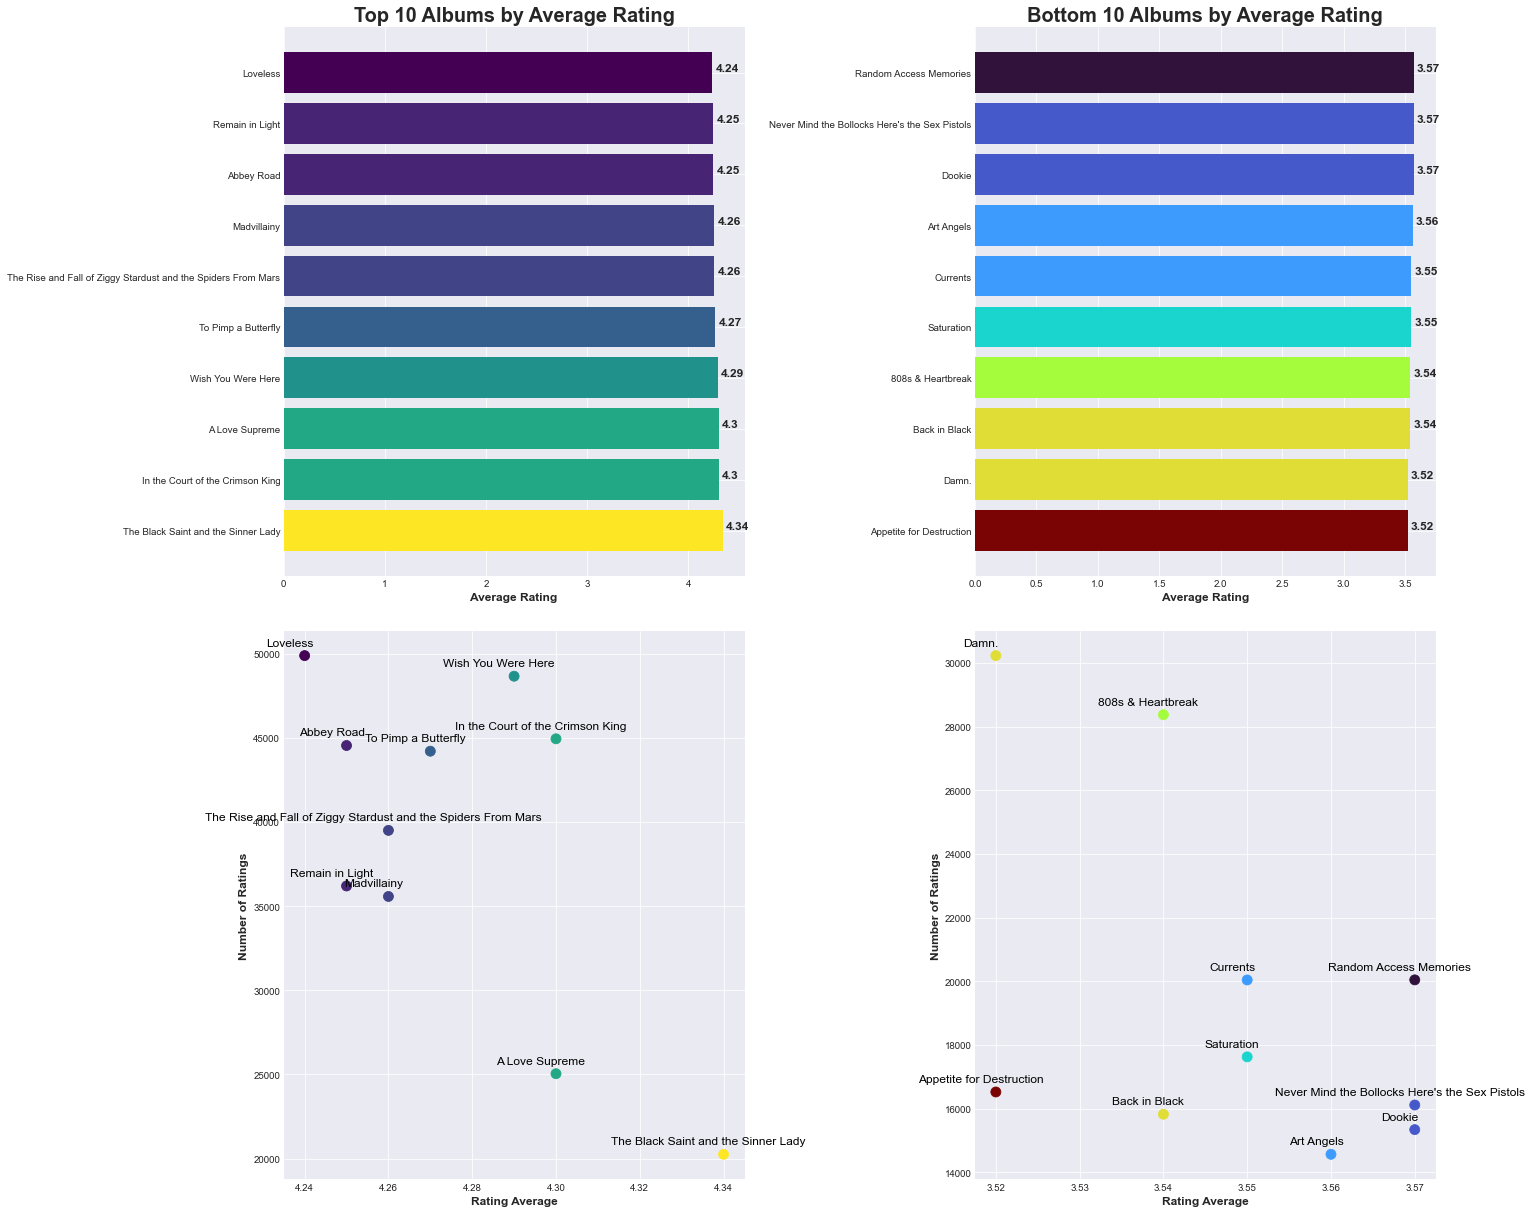

In [73]:
# Album Ratings and Number of Ratings - Best and Worst

# 'best' and 'worst'
sample = album_data.loc[:,['album', 'ars_name', 'avg_rat','num_rat']].sort_values(['avg_rat', 'num_rat'], ascending=False).head(10)
plt.style.use('seaborn-darkgrid')
rate_min = sample.avg_rat.min() # get range
rate_max = sample.avg_rat.max()
rate_norm = (sample.avg_rat - rate_min) / (rate_max - rate_min) # Normalize 
colors = cm.viridis(rate_norm) # Use a colormap to map vote average

sample2 = album_data.loc[:,['album', 'ars_name', 'avg_rat','num_rat']].sort_values(['avg_rat', 'num_rat'], ascending=True).head(10)
rate_min = sample.avg_rat.min() # get range
rate_max = sample.avg_rat.max()
rate_norm = (sample.avg_rat - rate_min) / (rate_max - rate_min) # Normalize 
colors2 = cm.turbo(rate_norm) # Use a colormap to map vote average


# best albums 
fig = plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
bar = plt.barh(y=sample.album, width=sample.avg_rat, color=colors)
plt.title("Top 10 Albums by Average Rating", fontsize=20, fontweight='bold')
plt.xlabel("Average Rating", fontsize=12, fontweight='semibold')
plt.ylabel("", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 25), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)

plt.subplot(2, 2, 3)
plt.scatter(sample.avg_rat, sample.num_rat, c=colors, cmap='viridis', s=100)
plt.xlabel('Rating Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Ratings', fontsize=12, fontweight='semibold')
for i, title in enumerate(sample.album):
    plt.annotate(title, (sample.loc[sample.album==title, "avg_rat"], sample.loc[sample.album==title, "num_rat"]),
                 textcoords="offset points",
                 xytext=(-15,10), ha='center', fontsize=12, color='black')


# Worst
plt.subplot(2, 2, 2)
bar = plt.barh(y=sample2.album, width=sample2.avg_rat, color=colors2)
plt.title("Bottom 10 Albums by Average Rating", fontsize=20, fontweight='bold')
plt.xlabel("Average Rating", fontsize=12, fontweight='semibold')
plt.ylabel("", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 25), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)
    
plt.subplot(2, 2, 4)
plt.scatter(sample2.avg_rat, sample2.num_rat, c=colors2, cmap='turbo', s=100)
plt.xlabel('Rating Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Ratings', fontsize=12, fontweight='semibold')
for i, title in enumerate(sample2.album):
    plt.annotate(title, (sample2.loc[sample2.album==title, "avg_rat"], sample2.loc[sample2.album==title, "num_rat"]),
                 textcoords="offset points",
                 xytext=(-15,10), ha='center', fontsize=12, color='black')
    

fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.1)


Note that the dataset contains only what is regarded as the best albums of the the past generations. So there is inherently no "worst" albums. These are simply the albums which so happened to have lower average ratings in the list of albums presented. 

In [74]:
# artists with > 3 albums
print("Total number of artists in Data:", len(album_data.ars_name.unique()))
print("Number of artists with more than 2 albums:" , len(album_data.ars_name.value_counts()[album_data.ars_name.value_counts()>=3]))
print("\n Artists with most Albums:\n", album_data.ars_name.value_counts()[album_data.ars_name.value_counts()>=3].head(6))

# best average ratings for artists with >1 Album
best_avg_art = album_data.groupby(by='ars_name').agg({"avg_rat": ["count", "mean"], "num_rat": ["sum"]})
best_avg_art = best_avg_art[best_avg_art[('avg_rat', 'count')]>=2].sort_values([('avg_rat', 'mean')], ascending=False)
best_avg_art.columns = ['count_albums', 'avg_rat', "num_rat"]
best_avg_art.head(6)

Total number of artists in Data: 2486
Number of artists with more than 2 albums: 466

 Artists with most Albums:
 Various Artists    18
Miles Davis        17
Tom Waits          13
John Williams      12
John Coltrane      12
Bob Dylan          11
Name: ars_name, dtype: int64


,count_albums,avg_rat,num_rat
ars_name,,,
Joy Division,2,4.100000,68622
The Jimi Hendrix Experience,3,4.076667,57990
Fishmans,2,4.070000,29089
Nick Drake,3,4.056667,61189
Madvillain,2,4.055000,36244
David Bowie,7,4.015714,170487


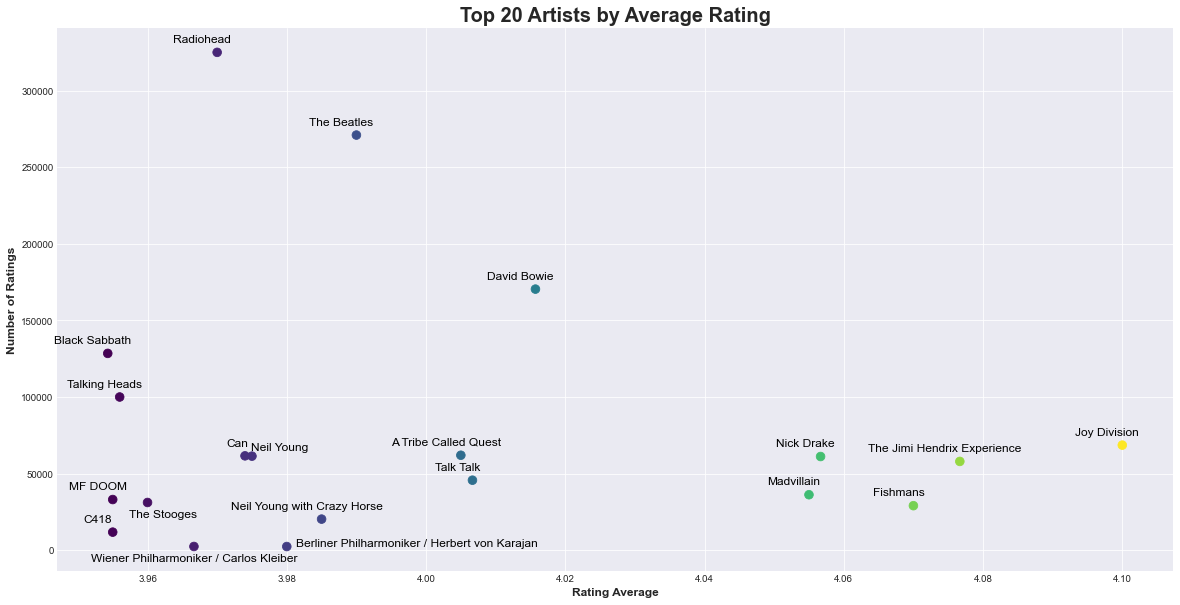

In [75]:
# Scatter Plots - number ratings + average rating (artists) (Top 20 Artists)
sample = best_avg_art.head(20)
fig, ax = plt.subplots(figsize=(20,10))

scatter1 = plt.scatter(sample.avg_rat, sample.num_rat, c=sample.avg_rat, cmap='viridis', s=75)
plt.xlabel('Rating Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Ratings', fontsize=12, fontweight='semibold')
plt.title("Top 20 Artists by Average Rating", fontsize=20, fontweight='bold')

for i, title in enumerate(sample.index):
    xy = (sample.loc[sample.index==title, "avg_rat"], sample.loc[sample.index==title, "num_rat"])
    if title == 'The Stooges':
        xytext = (15, -15)
    elif title == 'Neil Young':
        xytext = (35,5)
    elif title == 'Berliner Philharmoniker / Herbert von Karajan':
        xytext = (130, 0)
    elif title == 'Wiener Philharmoniker / Carlos Kleiber':
        xytext = (0, -15)
    else: 
        xytext = (-15, 10)
    plt.annotate(title, xy, textcoords="offset points", xytext=xytext, ha='center', fontsize=12, color='black')	


In [76]:
# extract year from release dates
album_data['year'] = album_data.rel_date.dt.year
display("Earliest Albums", album_data[['ars_name', 'rel_date', 'gens', 'album', 'avg_rat', 'year']].sort_values(['rel_date'],ascending=True).head(4))

# Average Ratings Per Year
avg_rat_year = album_data.groupby(by='year').agg({"avg_rat": ["count", "mean"]})
avg_rat_year = avg_rat_year.sort_index(ascending=False)
avg_rat_year.columns = ['count_albums', 'avg_rat']
display("Albums and Average Rating by Year:", avg_rat_year.sort_values(['avg_rat'], ascending=False).head(10))

'Earliest Albums'

,ars_name,rel_date,gens,album,avg_rat,year
3352,Billie Holiday,1947-06-01,"Vocal Jazz, Traditional Pop",Billie Holiday,3.73,1947
2831,Duke Ellington and His Orchestra,1951-01-01,Big Band,Masterpieces by Ellington,3.74,1951
750,Wilhelm Furtwängler / Ludwig Suthaus / Kirsten...,1952-11-10,"Opera, Romanticism",Tristan und Isolde,3.88,1952
3572,Thelonious Monk Trio,1953-01-01,Hard Bop,Thelonious,3.71,1953


'Albums and Average Rating by Year:'

,count_albums,avg_rat
year,,
1952,1,3.880000
1965,44,3.833636
1958,22,3.820909
1963,27,3.816296
1966,49,3.816122
1967,66,3.812576
1959,35,3.808857
1961,26,3.803846
1960,22,3.802273


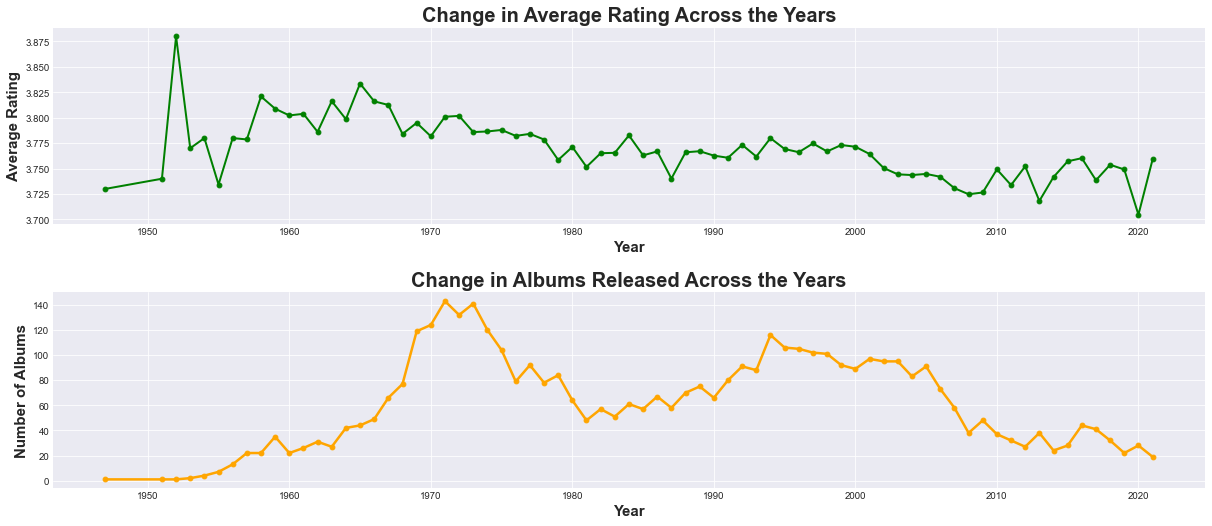

In [77]:
# Line Plots - release dates + rating

fig = plt.figure(figsize=(20, 8))

# Plot the data for each region
plt.subplot(2,1,1)
plt.plot(avg_rat_year.index, avg_rat_year.avg_rat, '-o', label='Average Rating', color='green', linewidth=2)
plt.xlabel('Year', fontsize=15, fontweight='bold')
plt.ylabel('Average Rating', fontsize=15, fontweight='bold')
plt.title('Change in Average Rating Across the Years', fontsize=20, fontweight='bold')


# Plot the data for each region
plt.subplot(2,1,2)
plt.plot(avg_rat_year.index, avg_rat_year.count_albums, '-o', label='Count of Album', color='orange', linewidth=2.5)
plt.xlabel('Year', fontsize=15, fontweight='bold')
plt.ylabel('Number of Albums', fontsize=15, fontweight='bold')
plt.title('Change in Albums Released Across the Years', fontsize=20, fontweight='bold')


fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)

In [78]:
album_data.head(3)

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,duration_sec,year
0,Radiohead,1997-06-16,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,70382,1531,OK Computer,0.135763,0.288083,0.565917,0.161053,0.159375,-9.102417,0.056308,115.450750,0.291733,4.000,268.435500,1997
1,Pink Floyd,1975-09-12,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,48662,983,Wish You Were Here,0.602800,0.373600,0.409800,0.363040,0.384940,-12.689400,0.039740,130.018800,0.259040,3.600,530.512000,1975
2,King Crimson,1969-10-10,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,44943,870,In the Court of the Crimson King,0.297686,0.340625,0.370475,0.327265,0.149138,-14.873125,0.043463,118.920625,0.279400,3.875,507.644125,1969


In [79]:
# group data by genre and year (look at genres with at least 25 albums)
gens_counts = album_data.gens.value_counts()[album_data.gens.value_counts()>=20].head(8)
gens_albums = album_data.loc[album_data['gens'].isin(gens_counts.index),:] # albums in top genres
album_rel_gens = gens_albums.groupby(by=['year','gens']).agg({"avg_rat": ["count", "mean"]})
album_rel_gens = album_rel_gens.reset_index()
album_rel_gens = album_rel_gens.set_index(['year'])
album_rel_gens.columns = ['gens','count', 'avg_rat']
display("Albums and Average Rating by Genre per Year:", album_rel_gens.sort_values(['avg_rat'], ascending=False).head(10))

'Albums and Average Rating by Genre per Year:'

,gens,count,avg_rat
year,,,
1971,Heavy Metal,1,4.120000
1984,Thrash Metal,2,3.940000
1971,Hard Rock,3,3.926667
1959,Post-Bop,2,3.910000
2005,Progressive Metal,1,3.900000
1976,Heavy Metal,1,3.890000
1960,Post-Bop,2,3.885000
1954,Hard Bop,1,3.880000
1988,Heavy Metal,2,3.880000


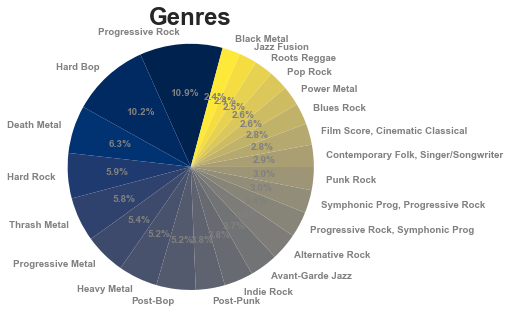

In [80]:
# Type of Genres and How they Represented
value_counts_genre = album_data.gens.value_counts()
small_genres = value_counts_genre[value_counts_genre < 20].index
gens_dat = album_data.copy()
gens_dat.loc[gens_dat.gens.isin(small_genres), 'gens'] = 'Other'
gens_dat = gens_dat[gens_dat.gens != 'Other']
value_counts_genre = gens_dat.gens.value_counts()

colors = cm.cividis(np.linspace(0, 1, len(value_counts_genre)))

# Production Companies mix - pie
fig = plt.figure(figsize=(14, 5)) # create figure
plt.subplot(1, 2, 1)
plt.pie(value_counts_genre, labels=value_counts_genre.index, 
       autopct='%.1f%%', startangle=75, colors=colors, textprops={'color':'grey', 'weight':'bold'})
plt.title("Genres", fontsize=24, fontweight='bold')
plt.axis('equal');

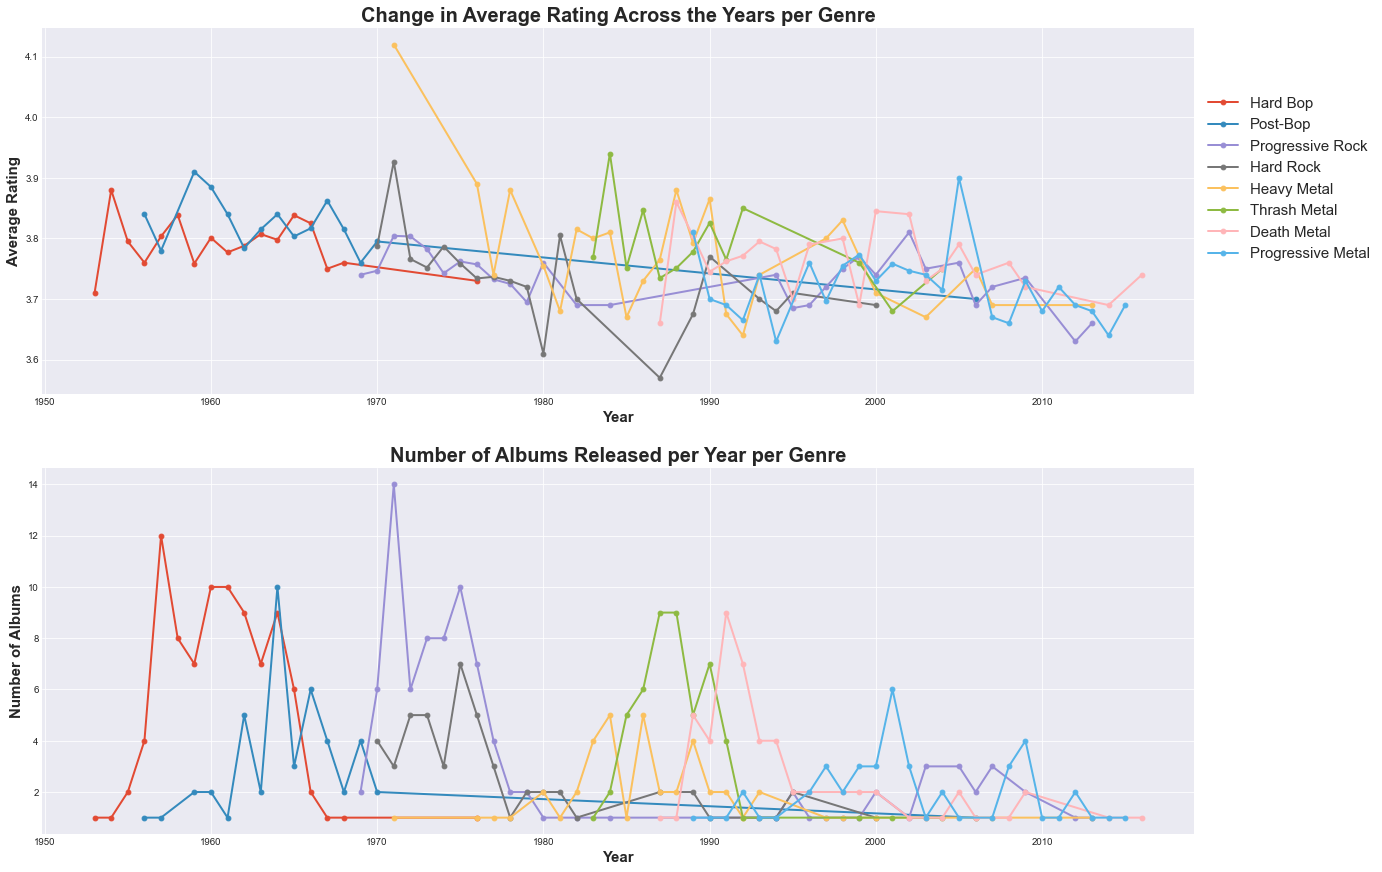

In [81]:
# Line Plots - release dates + number albums in genre

fig = plt.figure(figsize=(20, 14))

plt.subplot(2,1,1)
colors = ['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8',  '#56B4E9', '#CC79A7', '#009E73', '#F0E442', '#00CC00', '#FF00FF', '#6600FF', '#990000', '#CC0066']
for i,genre in enumerate(album_rel_gens['gens'].unique()):
    genre_group = album_rel_gens[album_rel_gens['gens'] == genre]
    plt.plot(genre_group.index, genre_group['avg_rat'], '-o', label=genre, color=colors[i], linewidth=2, )

plt.xlabel('Year', fontsize=15, fontweight='bold')
plt.ylabel('Average Rating', fontsize=15, fontweight='bold')
plt.title('Change in Average Rating Across the Years per Genre', fontsize=20, fontweight='bold');
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.85), fontsize=15);

plt.subplot(2,1,2)
colors = ['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8',  '#56B4E9', '#CC79A7', '#009E73', '#F0E442', '#00CC00', '#FF00FF', '#6600FF', '#990000', '#CC0066']
for i,genre in enumerate(album_rel_gens['gens'].unique()):
    genre_group = album_rel_gens[album_rel_gens['gens'] == genre]
    plt.plot(genre_group.index, genre_group['count'], '-o', label=genre, color=colors[i], linewidth=2, )

plt.xlabel('Year', fontsize=15, fontweight='bold')
plt.ylabel('Number of Albums', fontsize=15, fontweight='bold')
plt.title('Number of Albums Released per Year per Genre', fontsize=20, fontweight='bold');

fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)


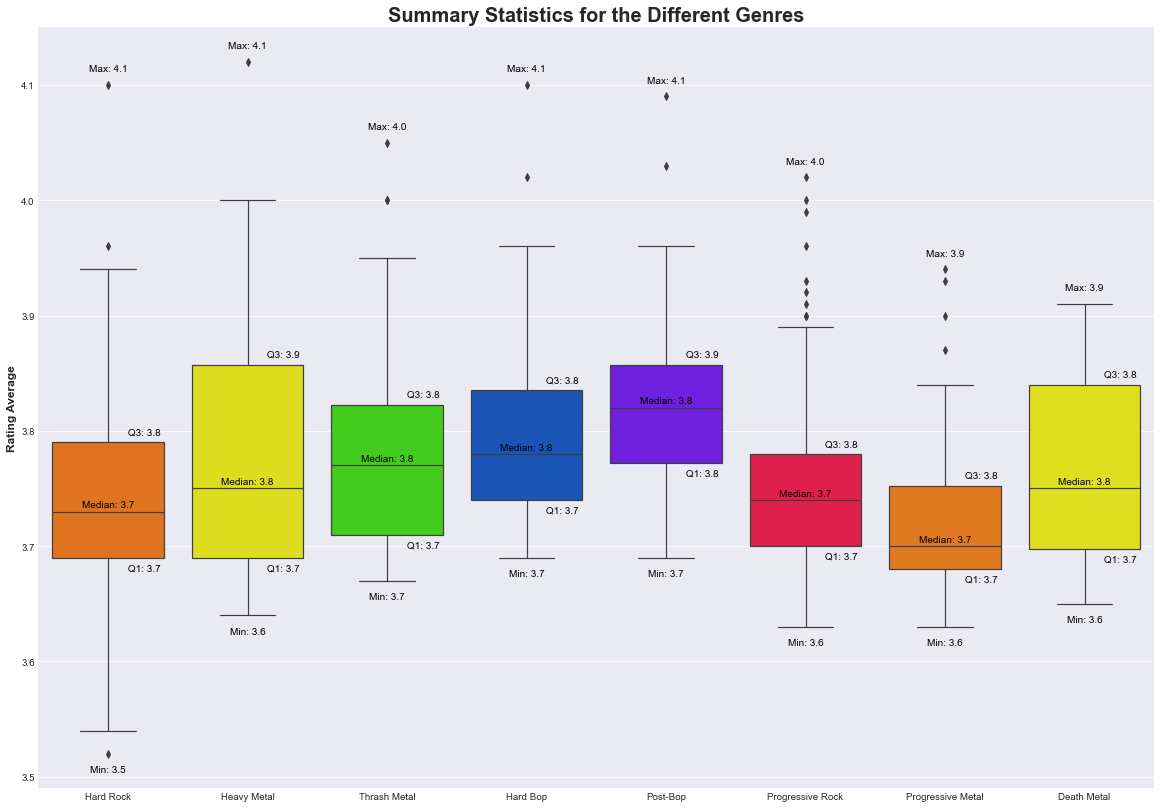

In [82]:
# Box Plots - Genre
gens_counts = album_data.gens.value_counts()[album_data.gens.value_counts()>=20].head(8)
gens_albums = album_data.loc[album_data['gens'].isin(gens_counts.index),:] # albums in top genres

fig = plt.figure(figsize=(20, 14))
sns.boxplot(x="gens", y="avg_rat", data=gens_albums, palette='prism')
plt.title("Summary Statistics for the Different Genres", fontsize=20, fontweight='bold')
plt.xlabel("", fontsize=20, fontweight='bold')
plt.ylabel("Rating Average", fontsize=12, fontweight='bold')

for i in gens_albums['gens'].unique():
    stats = gens_albums[gens_albums['gens'] == i]['avg_rat']
    median = stats.median()
    quartile_1 = stats.quantile(0.25)
    quartile_3 = stats.quantile(0.75)
    max_value = stats.max()
    min_value = stats.min()
    
    plt.text(gens_albums['gens'].unique().tolist().index(i)+0, max_value+0.01, 'Max: {:.1f}'.format(max_value), ha = 'center', color = 'black', va='bottom')
    plt.text(gens_albums['gens'].unique().tolist().index(i)+0.26, quartile_3+0.005, 'Q3: {:.1f}'.format(quartile_3), ha = 'center', color = 'black', va='bottom')
    plt.text(gens_albums['gens'].unique().tolist().index(i), median+0.002, 'Median: {:.1f}'.format(median), ha = 'center', color = 'black', va='bottom')
    plt.text(gens_albums['gens'].unique().tolist().index(i)+0.26, quartile_1-0.005, 'Q1: {:.1f}'.format(quartile_1), ha = 'center', color = 'black', va='top')
    plt.text(gens_albums['gens'].unique().tolist().index(i), min_value-0.01, 'Min: {:.1f}'.format(min_value), ha = 'center', color = 'black', va='top')


In [83]:
album_data.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_rat,4402.0,3.771320,0.100606,3.520000e+00,3.700000,3.750000,3.810000,4.340000
num_rat,4402.0,4346.915720,6228.544443,2.600000e+02,818.250000,2002.500000,5156.500000,70382.000000
num_revs,4402.0,76.538846,112.977848,0.000000e+00,16.000000,39.000000,91.000000,1549.000000
acousticness,4402.0,0.338409,0.288088,6.609091e-07,0.091732,0.261394,0.543950,0.996000
danceability,4402.0,0.477338,0.158556,7.490000e-02,0.369511,0.473867,0.584472,0.946000
energy,4402.0,0.575443,0.226569,2.360000e-03,0.422866,0.598767,0.746233,1.000000
instrumentalness,4402.0,0.250817,0.286694,0.000000e+00,0.009679,0.126991,0.423197,0.993000
liveness,4402.0,0.201108,0.096184,3.210000e-02,0.138433,0.179018,0.238470,0.937000
loudness,4402.0,-10.674275,5.197312,-4.526700e+01,-13.054771,-9.590507,-7.031358,0.942625
speechiness,4402.0,0.087147,0.081774,2.620000e-02,0.041927,0.055399,0.094167,0.944000


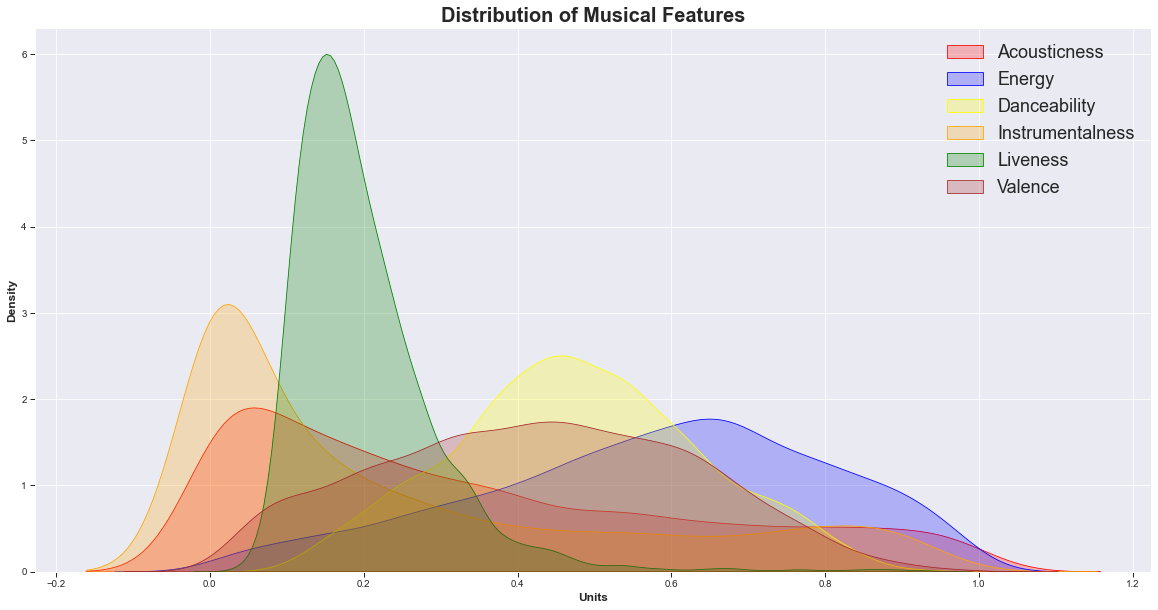

In [84]:
# Density Plots - music features
fig = plt.figure(figsize=(20, 10))
sns.set_context("paper",font_scale=1.1)

ax = sns.kdeplot(album_data['acousticness'],
                 color="Red", shade = True)
ax = sns.kdeplot(album_data['energy'],
                 ax =ax, color="Blue", shade= True)
ax = sns.kdeplot(album_data['danceability'],
                 ax =ax, color="Yellow", shade= True)
ax = sns.kdeplot(album_data['instrumentalness'],
                 ax =ax, color="Orange", shade= True)
ax = sns.kdeplot(album_data['liveness'],
                 ax =ax, color="Green", shade= True)
ax = sns.kdeplot(album_data['valence'],
                 ax =ax, color="Brown", shade= True)
ax.legend(["Acousticness","Energy", "Danceability", "Instrumentalness", "Liveness", "Valence"],loc='upper right', fontsize=18);
ax.set_ylabel('Density', fontsize=12, fontweight='bold')
ax.set_xlabel('Units', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Musical Features', fontsize=20, fontweight='bold');

We create a matrix of scatterplots, where the diagonal elements represent histograms of the respective features and the off-diagonal elements represent scatter plots of the pairs of features.



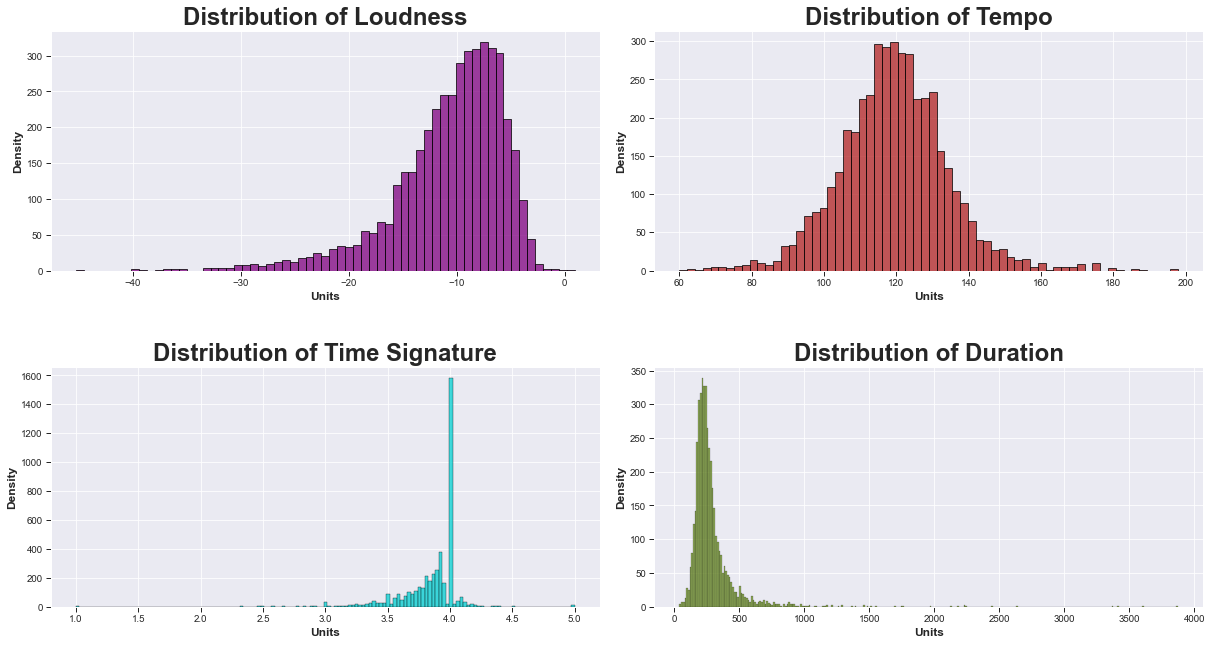

In [85]:
fig = plt.figure(figsize=(20, 10))

# Loudness 
plt.subplot(2,2,1)
sns.histplot(album_data['loudness'], color="Purple")
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.xlabel('Units', fontsize=12, fontweight='bold')
plt.title('Distribution of Loudness', fontsize=24, fontweight='bold')

# Tempo
plt.subplot(2,2,2)
sns.histplot(album_data['tempo'], color="FireBrick")
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.xlabel('Units', fontsize=12, fontweight='bold')
plt.title('Distribution of Tempo', fontsize=24, fontweight='bold')

# Time signature
plt.subplot(2,2,3)
sns.histplot(album_data['time_signature'], color="DarkTurquoise")
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.xlabel('Units', fontsize=12, fontweight='bold')
plt.title('Distribution of Time Signature', fontsize=24, fontweight='bold')

# Duration
plt.subplot(2,2,4)
sns.histplot(album_data['duration_sec'], color="OliveDrab")
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.xlabel('Units', fontsize=12, fontweight='bold')
plt.title('Distribution of Duration', fontsize=24, fontweight='bold')

fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.4);




### <a id='toc3_2_1_'></a>[K-Means](#toc0_)

K-means is a popular clustering algorithm that is used to group similar data points into clusters. The goal of k-means is to partition the data into $k$ clusters, where $k$ is a pre-specified number, such that the data points within each cluster are as similar as possible, and the data points across different clusters are as dissimilar as possible.

The algorithm works by initializing $k$ random centroids, and then assigning each data point to the closest centroid. The centroids are then recomputed as the mean of all data points assigned to that centroid. The process of assigning data points to centroids and recomputing centroids is repeated until the centroids stop changing, or until a maximum number of iterations is reached.

***TLDR***
1. **Choose the number of clusters, $K$**: can choose $K$ based on domain knowledge or use methods such as the elbow method or the silhouette score.
2. **Initialize K centroids randomly**: These centroids will serve as the starting point for the K-Means algorithm.
3. Assign each point to the nearest centroid: each data point is assigned to the closest centroid based on Euclidean distance
4. **Recalculate the mean of each cluster**: After all the points have been assigned to a cluster, the mean of each cluster is calculated.
5. **Repeat steps 3 and 4 until the centroids stop changing or a maximum number of iterations is reached**: at each iteration, the number of points assigned to each centroid can change, which can result in the movement of the centroids.
6. **Label each point with the cluster it belongs to**: once convergence, each data point is labeled with the cluster it belongs to.


In [86]:
from sklearn.preprocessing import StandardScaler


clust_data = album_data.copy()
clust_data = clust_data[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
                          'loudness', 'speechiness', 'tempo', 'valence']]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler to the data
scaler.fit(clust_data)

# Transform the data to have zero mean and unit variance
clust_data_scaled = scaler.transform(clust_data)
print("Shape of Scaled Data:", clust_data_scaled.shape)
display(pd.DataFrame(clust_data_scaled).describe().T)

Shape of Scaled Data: (4402, 9)


,count,mean,std,min,25%,50%,75%,max
0,4402.0,-1.813381e-17,1.000114,-1.174803,-0.856352,-0.267360,0.713547,2.282864
1,4402.0,-3.759046e-16,1.000114,-2.538440,-0.680135,-0.021894,0.675763,2.956153
2,4402.0,2.253485e-17,1.000114,-2.529686,-0.673497,0.102958,0.753899,1.874070
3,4402.0,-4.037862e-17,1.000114,-0.874962,-0.841197,-0.431963,0.601337,2.589060
4,4402.0,-1.679080e-16,1.000114,-1.757335,-0.651693,-0.229689,0.388484,7.651746
5,4402.0,1.130778e-16,1.000114,-6.656644,-0.458076,0.208549,0.701003,2.235429
6,4402.0,1.532168e-16,1.000114,-0.745391,-0.553044,-0.388281,0.085852,10.479448
7,4402.0,5.425767e-16,1.000114,-3.969878,-0.597829,-0.007666,0.586152,5.266488
8,4402.0,-3.069633e-16,1.000114,-2.110385,-0.752769,0.004154,0.763299,2.816036


After fitting the `StandardScaler` to the data, you can use the `transform` method to standardize the data to have zero mean and unit variance. Now we look at an elbow plot and can also use the gap statistic to choose the optimal number of clusters for $K$-means. 

<br>

So we produce a plot of the sum of squared distances (also known as the within-cluster sum of squared errors) for each number of clusters. The elbow in the plot represents the optimal number of clusters. 

> In other words, the optimal number of clusters is the number of clusters that results in a small increase in the sum of squared distances as you increase the number of clusters.



Text(0.5, 1.0, 'Silhouette width method')

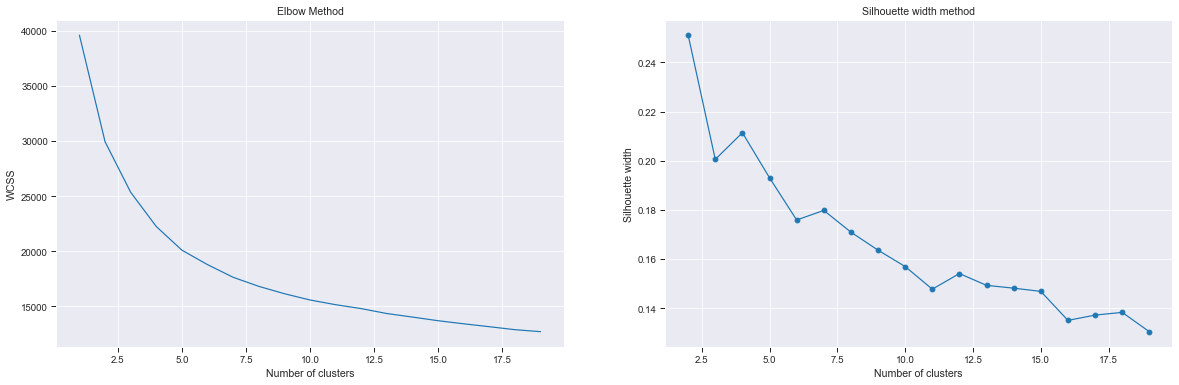

In [87]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine K -  ELBOW METHOD
fig = plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(clust_data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Determine K -  SILHOUETTE
plt.subplot(1,2,2)

silhouette_scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(clust_data_scaled)
    labels = kmeans.labels_
    score = silhouette_score(clust_data_scaled, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette width')
plt.title('Silhouette width method')


 In addition to the elbow plot, you can also use the silhouette width method to choose the optimal number of clusters. It measures how similar each point is to its own cluster compared to other clusters. A higher silhouette score indicates that a point is well-matched to its own cluster and poorly-matched to neighboring clusters, which is a sign of good clustering.

 Given the plot there is a strong suggestion that the data may not have well-defined clusters, or the algorithm is not able to find meaningful clusters in the data. 

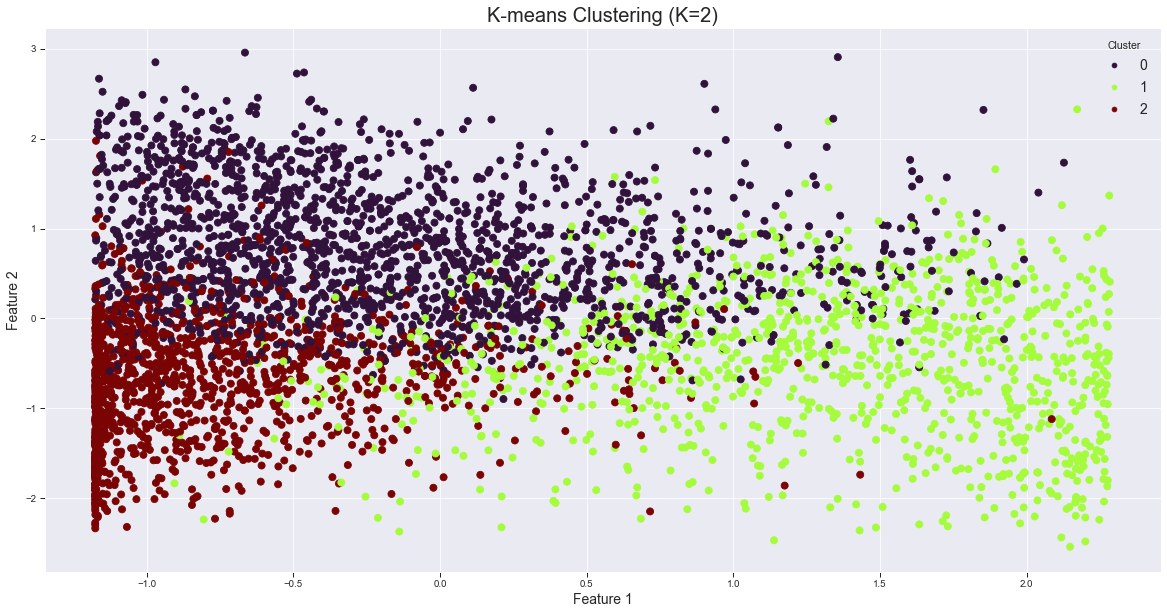

In [88]:
# Apply K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(clust_data_scaled)

# Define a color map with a color for each cluster
color_map = plt.cm.get_cmap('turbo', len(np.unique(y_kmeans)))

# Visualize the clusters
fig, ax = plt.subplots(figsize=(20, 10))
scatter = ax.scatter(clust_data_scaled[:, 0], clust_data_scaled[:, 1], c=y_kmeans, s=50, cmap=color_map)
ax.set_title('K-means Clustering (K=2)', fontsize = 20)
ax.set_xlabel('Feature 1', fontsize = 14)
ax.set_ylabel('Feature 2', fontsize = 14)
legend = ax.legend(*scatter.legend_elements(), title='Cluster', fontsize = 14)
plt.show()

After fitting the model to the data, the cluster labels for each data point can be obtained by calling the predict method on the `KMeans` object. The cluster centers can be obtained by accessing the `cluster_centers_` attribute of the `KMeans` object.



In [89]:
# Extract cluster centers
centers = kmeans.cluster_centers_
print('Cluster centers:')
print(centers) # (clusters, features) and elements are averages

# Calculate inertia
inertia = kmeans.inertia_
print('\nInertia:', inertia)

# Calculate average silhouette score
silhouette_avg = silhouette_score(clust_data_scaled, y_kmeans)
print('\nSilhouette score:', silhouette_avg, "\n")

# Calculate silhouette score per cluster
from sklearn.metrics import silhouette_samples
silhouette_vals = silhouette_samples(clust_data_scaled, y_kmeans) # Calculate silhouette score for each sample
cluster_silhouette_avgs = [] # Create a list to store the average silhouette score for each cluster
for i in range(3):
    
    cluster_samples = clust_data_scaled[y_kmeans == i]
    cluster_silhouette_avg = np.mean(silhouette_vals[y_kmeans == i])
    cluster_silhouette_avgs.append(cluster_silhouette_avg)
    print(f'Average silhouette score for cluster {i}: {cluster_silhouette_avg:.3f}')


Cluster centers:
[[-0.15476625  0.78538506  0.14146866 -0.55627555 -0.03925188  0.30004144
   0.30401218  0.07632938  0.75677088]
 [ 1.26662822 -0.50060199 -1.28525777  0.65108333 -0.46644099 -1.21579285
  -0.41691872 -0.60883931 -0.67000687]
 [-0.77155611 -0.71221625  0.80477747  0.27294641  0.41930371  0.52782926
  -0.10147058  0.36814927 -0.53976474]]

Inertia: 25357.923571423686

Silhouette score: 0.2005284226820835 

Average silhouette score for cluster 0: 0.172
Average silhouette score for cluster 1: 0.255
Average silhouette score for cluster 2: 0.198


In [90]:
centers = pd.DataFrame(centers)
centers.columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
                          'loudness', 'speechiness', 'tempo', 'valence']
centers

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,-0.154766,0.785385,0.141469,-0.556276,-0.039252,0.300041,0.304012,0.076329,0.756771
1,1.266628,-0.500602,-1.285258,0.651083,-0.466441,-1.215793,-0.416919,-0.608839,-0.670007
2,-0.771556,-0.712216,0.804777,0.272946,0.419304,0.527829,-0.101471,0.368149,-0.539765


### <a id='toc3_2_2_'></a>[PAM Clustering](#toc0_)

PAM is a variation of the k-means algorithm. The main difference between k-means and PAM is that in k-means, the centroids are the mean of the data points assigned to a cluster, whereas in PAM, the medoids are the actual data points that represent the cluster. This makes PAM more robust to outliers, as the medoids are chosen based on the actual data points, rather than the mean, which can be affected by outliers.

Text(0.5, 1.0, 'Silhouette width method')

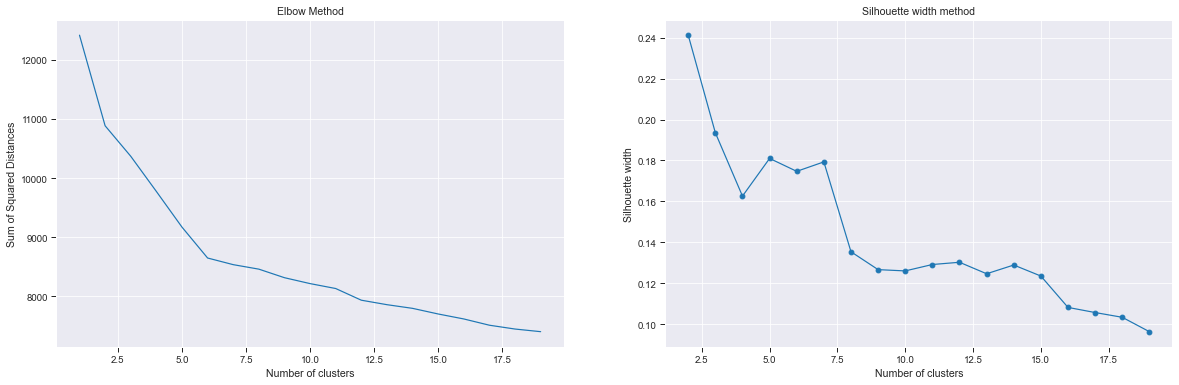

In [91]:
from sklearn_extra.cluster import KMedoids

# Determine K -  ELBOW METHOD
fig = plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ssd = []
for k in range(1, 20):
    pam = KMedoids(n_clusters=k, metric='euclidean', init='k-medoids++', max_iter=300, random_state=0)
    pam.fit(clust_data_scaled)
    ssd.append(pam.inertia_)

plt.plot(range(1, 20), ssd)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')

# Determine K -  SILHOUETTE
plt.subplot(1,2,2)

silhouette_scores = []
for k in range(2, 20):
    pam = KMedoids(n_clusters=k, metric='euclidean', init='k-medoids++', max_iter=300, random_state=0)
    labels = pam.fit_predict(clust_data_scaled)
    score = silhouette_score(clust_data_scaled, labels, metric='euclidean')
    silhouette_scores.append(score)

plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette width')
plt.title('Silhouette width method')


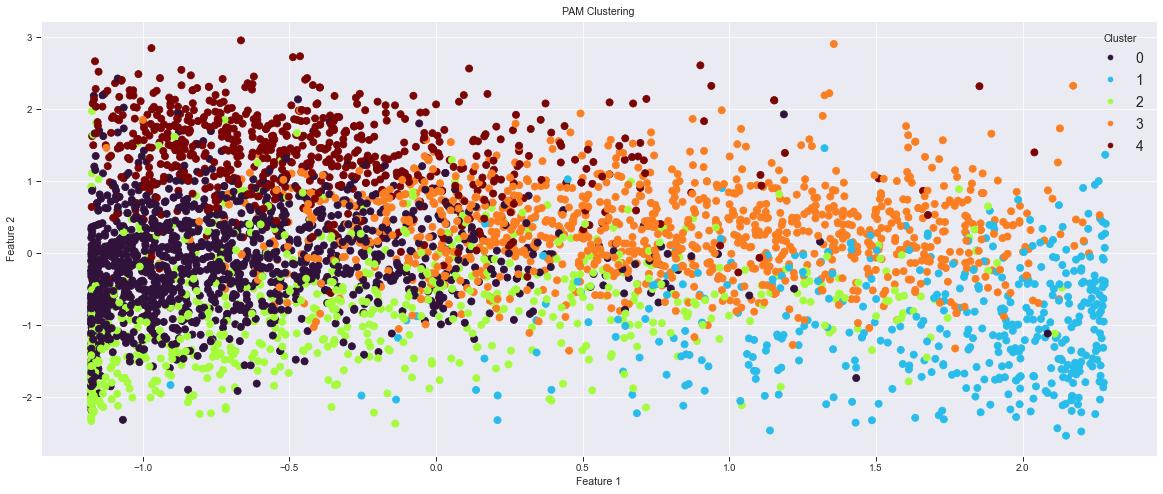

In [92]:
# Apply PAM with the optimal number of clusters
pam = KMedoids(n_clusters=5, metric='euclidean', init='k-medoids++', max_iter=600, random_state=0)
y_pam = pam.fit_predict(clust_data_scaled)

# Define a color map with a color for each cluster
color_map = plt.cm.get_cmap('turbo', len(np.unique(y_pam)))

# Visualize the clusters
fig, ax = plt.subplots(figsize=(20, 8))
scatter = ax.scatter(clust_data_scaled[:, 0], clust_data_scaled[:, 1], c=y_pam, s=50, cmap = color_map)
ax.set_title('PAM Clustering')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
legend = ax.legend(*scatter.legend_elements(), title='Cluster', fontsize = 14)
plt.show()


In [93]:
# Extract cluster centers
centers = pam.cluster_centers_
print('Cluster centers:')
print(centers) # (clusters, features) and elements are averages

# Calculate inertia
inertia = pam.inertia_
print('\nInertia:', inertia)

# Calculate average silhouette score
silhouette_avg = silhouette_score(clust_data_scaled, y_pam)
print('\nSilhouette score:', silhouette_avg, "\n")

# Calculate silhouette score per cluster
from sklearn.metrics import silhouette_samples
silhouette_vals = silhouette_samples(clust_data_scaled, y_pam) # Calculate silhouette score for each sample
cluster_silhouette_avgs = [] # Create a list to store the average silhouette score for each cluster
for i in range(5):
    
    cluster_samples = clust_data_scaled[y_pam == i]
    cluster_silhouette_avg = np.mean(silhouette_vals[y_pam == i])
    cluster_silhouette_avgs.append(cluster_silhouette_avg)
    print(f'Average silhouette score for cluster {i}: {cluster_silhouette_avg:.3f}')

Cluster centers:
[[-0.51310916 -0.2730313   0.69966732 -0.28083801  0.24514058  0.88426435
  -0.31965291  0.37971677  0.35227708]
 [ 1.55449868 -1.06314111 -1.78662485  1.40053168 -0.62846745 -2.3696096
  -0.52373409 -0.95248103 -1.27246059]
 [-0.08076197 -0.76062923 -0.15865694  1.39073487  0.04358504 -0.07477784
  -0.52310802 -0.04918583 -0.57016597]
 [ 0.71198515  0.17369141 -0.51179076 -0.49530328 -0.45096623 -0.23338746
  -0.53182201 -0.0277976   0.63520213]
 [-0.53068799  1.42114181  0.39311465 -0.36482242 -0.2486709   0.45627471
   0.73253607 -0.8202252   0.8908028 ]]

Inertia: 9171.000542509855

Silhouette score: 0.1809952483230537 

Average silhouette score for cluster 0: 0.171
Average silhouette score for cluster 1: 0.279
Average silhouette score for cluster 2: 0.105
Average silhouette score for cluster 3: 0.253
Average silhouette score for cluster 4: 0.110


In [94]:
centers = pd.DataFrame(centers)
centers.columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
                          'loudness', 'speechiness', 'tempo', 'valence']
centers

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,-0.513109,-0.273031,0.699667,-0.280838,0.245141,0.884264,-0.319653,0.379717,0.352277
1,1.554499,-1.063141,-1.786625,1.400532,-0.628467,-2.369610,-0.523734,-0.952481,-1.272461
2,-0.080762,-0.760629,-0.158657,1.390735,0.043585,-0.074778,-0.523108,-0.049186,-0.570166
3,0.711985,0.173691,-0.511791,-0.495303,-0.450966,-0.233387,-0.531822,-0.027798,0.635202
4,-0.530688,1.421142,0.393115,-0.364822,-0.248671,0.456275,0.732536,-0.820225,0.890803


### Agglomerative Clustering

We apply this hierarchical clustering method which starts by treating each data point as a separate cluster and then iteratively merges the closest pairs of clusters into a larger cluster until all data points belong to a single cluster. The process of merging clusters continues until a stopping criterion is met, such as a predefined number of clusters or a minimum distance threshold.

In [104]:
from sklearn.cluster import AgglomerativeClustering

# Load the data
X = clust_data_scaled

# determine the optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(2, 20):
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# choose the optimal number of clusters based on the silhouette score
optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print("Optimal Number of Clusters using Silhouette Width:", optimal_n_clusters)
print("Silhouette Width:", max(silhouette_scores))

Optimal Number of Clusters using Silhouette Width: 2
Silhouette Width: 0.19534739376483334


In [105]:
# fit the agglomerative clustering model with the chosen number of clusters
model = AgglomerativeClustering(n_clusters=optimal_n_clusters)
labels = model.fit_predict(X)

# assign the labels to the original dataframe
X_dat = pd.DataFrame(X)
X_dat['cluster'] = labels

# print the number of samples in each cluster
print("Number of Observations in Each Cluster:\n", X_dat['cluster'].value_counts())

# print clusters for each observation
print("\nWhat Cluster Each Observation Belongs to:\n", X_dat['cluster'])

Number of Observations in Each Cluster:
 1    2656
0    1746
Name: cluster, dtype: int64

What Cluster Each Observation Belongs to:
 0       1
1       0
2       0
3       1
4       1
       ..
4397    1
4398    1
4399    1
4400    0
4401    0
Name: cluster, Length: 4402, dtype: int64



## <a id='toc3_3_'></a>[Correlation Matrix](#toc0_)

We are to also compute the correlation matrix to identify any strong relationships between the features. This can help us determine which features are most important for the recommendations and inform the modeling process.

In [ ]:
# Correlation Heat Map
plt.figure(figsize=(25, 10))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

# Scatter Plot - Pairs Plot





## <a id='toc3_4_'></a>[Missing Values](#toc0_)

We now are to check for missing values in the data and decide how to handle them. Depending on the amount of missing data, we may need to look at removing the missing data, fill in the missing data using imputation techniques such as mean imputation or median imputation, or use a different modeling technique that can handle missing data.


 There are missing values in the data.


,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature
773,Nino Rota,1974,"Film Score, Cinematic Classical",NaN,3.90,358,4,Amarcord,0.725333,0.419000,0.283167,0.555167,0.129700,-12.809500,0.037783,124.176417,0.456583,148495.666667,4.000000
1316,Nino Rota / Carmine Coppola,December 1974,"Film Score, Cinematic Classical",NaN,3.84,353,2,"The Godfather, Part II",0.995000,0.489000,0.058000,0.940000,0.110000,-17.876000,0.052100,63.876000,0.183000,162586.000000,4.000000
1580,Jon Brion,5 November 2002,Film Score,NaN,3.82,435,8,Punch-Drunk Love,0.820588,0.414641,0.208959,0.540400,0.190071,-17.323235,0.039612,106.106706,0.313941,155724.058824,3.647059
1646,Philip Glass,10 December 2002,"Film Score, Modern Classical",NaN,3.81,504,5,The Hours,0.995000,0.415000,0.026000,0.938000,0.107000,-36.700000,0.049600,136.191000,0.268000,285443.000000,4.000000
1683,Trevor Jones / Randy Edelman,6 October 1992,"Film Score, Cinematic Classical",NaN,3.82,322,8,The Last of the Mohicans,0.398999,0.163606,0.197225,0.893625,0.144369,-20.457313,0.040988,112.838313,0.066863,206200.062500,3.625000



 Columns with Missing Data:
 ars_name             0
rel_date             0
gens                 0
descs               98
avg_rat              0
num_rat              0
num_revs             0
album                0
acousticness         0
danceability         0
energy               0
instrumentalness     0
liveness             0
loudness             0
speechiness          0
tempo                0
valence              0
duration_ms          0
time_signature       0
dtype: int64


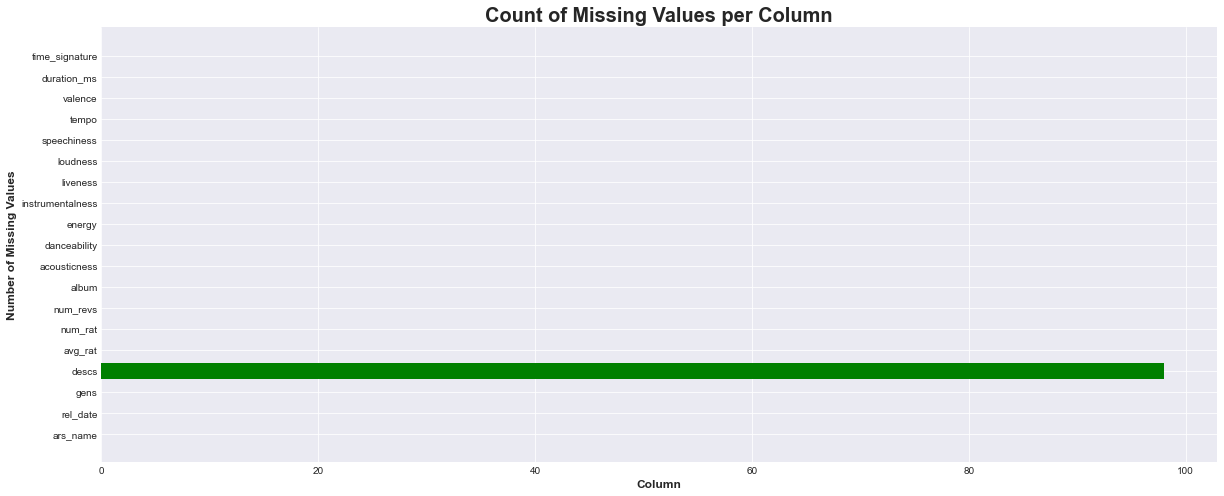

In [44]:
# check if any of the columns have missing values
is_na = album_data.isna().any().any()

# if there are NA values in columns -> show rows, show number of NAs per column
if is_na:
    print("\n There are missing values in the data.")
    display(album_data[album_data.isna().any(axis=1)].head(5))
    print("\n Columns with Missing Data:\n", album_data.isna().sum())
    missing_values_count = album_data.isna().sum()
    plt.style.use('seaborn-darkgrid')
    fig = plt.figure(figsize=(20, 8))
    plt.barh(y=missing_values_count.index, width=missing_values_count.values, color="green")
    plt.xlabel("Column", fontsize=12, fontweight='semibold')
    plt.ylabel("Number of Missing Values", fontsize=12, fontweight='semibold')
    plt.title("Count of Missing Values per Column", fontsize=20, fontweight='bold')
    plt.show()

else:
    print("There are no missing values in the data.")

Only `descs` has missing values. For the reocmmender system, it would be nice to incorporate this feature to identify similar type of albums. So we can look at imputing these missing values. 

One logical solution would be to use the genres of these albums as the descriptions of them (use `gens` as `descs`). This is what  we shall do.

In [46]:
# for rows with missing data, make descs = gens
album_data.loc[album_data.isna().any(axis=1), "descs"] = album_data[album_data.isna().any(axis=1)].gens

# check for missing data
is_na = album_data.isna().any().any()
if is_na: print("\n There are missing values in the data.")
else: print("There are no missing values in the data.")

There are no missing values in the data.


# <a id='toc4_'></a>[Content Based Filtering](#toc0_)

## <a id='toc4_1_'></a>[Model 1: Standard CBF](#toc0_)

## <a id='toc4_2_'></a>[Model 2: CBF with Weighted Similarity Measure](#toc0_)

To incorporate album ratings into your content-based recommender system, you can use a weighted similarity measure that takes into account both the musical features and the album ratings. The process is very similar to that of Model 1. We clean and preprocess the data to remove any missing or inconsistent values. You may also need to normalize the musical features and album ratings to ensure that they are on a common scal. We use shall compute the similarity between each pair of albums based on both the musical features and album ratings. Now, we can use a weighted similarity measure such as the weighted cosine similarity or the weighted Pearson correlation to measure the similarity between the albums. Based on the similarity matrix, generate recommendations for a given album by selecting the most similar albums to the given album. When generating recommendations, you can use the weighted similarity measure to rank the albums based on both the musical features and album ratings. Albums with higher average ratings should be ranked higher, as they indicate that they are more popular or highly rated by users.

***Note***: by incorporating album ratings into the recommendations, you can ensure that albums with higher average ratings are ranked higher, possibly providing a better overall experience for the users.

# <a id='toc5_'></a>[Results and Conclusion](#toc0_)